# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0 $, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0 $

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



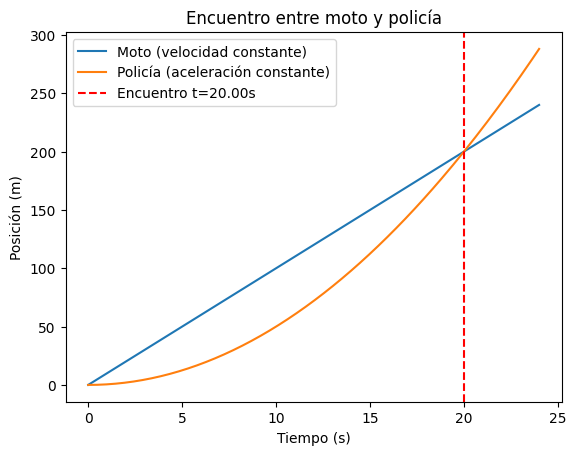

El instante en que se encuentran es t = 20.00 s


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar datos al usuario
vm = float(input("Velocidad de la moto (m/s): "))
ap = float(input("Aceleración del policía (m/s^2): "))

# Ecuaciones:
# Moto: xf = xi + vm * t
# Policía: xf = xi + 0.5 * ap * t^2

# Como ambos parten de xi=0 y se encuentran cuando xf_moto = xf_policia:
# vm * t = 0.5 * ap * t^2
# 0 = 0.5 * ap * t^2 - vm * t
# 0 = t (0.5 * ap * t - vm)
# t = 0 o t = 2*vm/ap (descartamos t=0)

t_encuentro = 2 * vm / ap

# Creamos el tiempo para graficar
t = np.linspace(0, t_encuentro * 1.2, 200)
xf_moto = vm * t
xf_policia = 0.5 * ap * t**2

plt.plot(t, xf_moto, label='Moto (velocidad constante)')
plt.plot(t, xf_policia, label='Policía (aceleración constante)')
plt.axvline(t_encuentro, color='red', linestyle='--', label=f'Encuentro t={t_encuentro:.2f}s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Encuentro entre moto y policía')
plt.legend()
plt.show()

print(f"El instante en que se encuentran es t = {t_encuentro:.2f} s")


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1 $ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




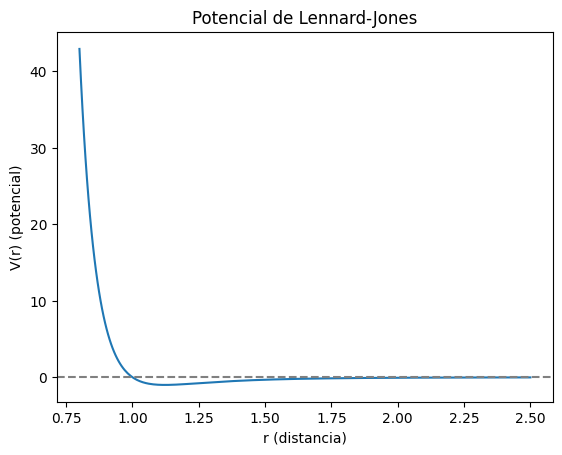

Distancia de equilibrio teórica: rm = 1.122 sigma
Para sigma=0.8: rm numérico = 0.899, rm teórico = 0.898
Para sigma=1: rm numérico = 1.124, rm teórico = 1.122
Para sigma=1.2: rm numérico = 1.349, rm teórico = 1.347


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# a. Función para el potencial Lennard-Jones
def lennard_jones(r, sigma, epsilon):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# b. Gráfica del potencial con sigma=epsilon=1, rc=2.5*sigma
sigma = 1
epsilon = 1
rc = 2.5 * sigma
r = np.linspace(0.8 * sigma, rc, 300)
V = lennard_jones(r, sigma, epsilon)

plt.plot(r, V)
plt.xlabel('r (distancia)')
plt.ylabel('V(r) (potencial)')
plt.title('Potencial de Lennard-Jones')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# c. Verificación de la distancia de equilibrio rm = 2^(1/6)*sigma
rm_teorico = 2**(1/6) * sigma
print(f"Distancia de equilibrio teórica: rm = {rm_teorico:.3f} sigma")

# Para diferentes sigma
for sigma in [0.8, 1, 1.2]:
    r = np.linspace(0.8 * sigma, 2.5 * sigma, 300)
    V = lennard_jones(r, sigma, epsilon)
    rm_numerico = r[np.argmin(V)]
    print(f"Para sigma={sigma}: rm numérico = {rm_numerico:.3f}, rm teórico = {2**(1/6)*sigma:.3f}")


##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [4]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]


<Figure size 1200x600 with 0 Axes>

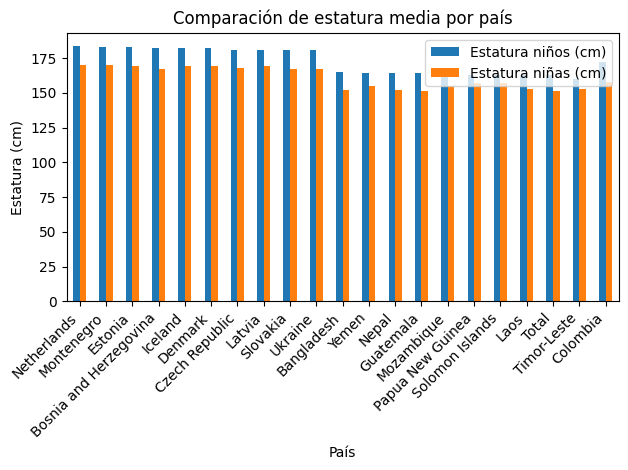

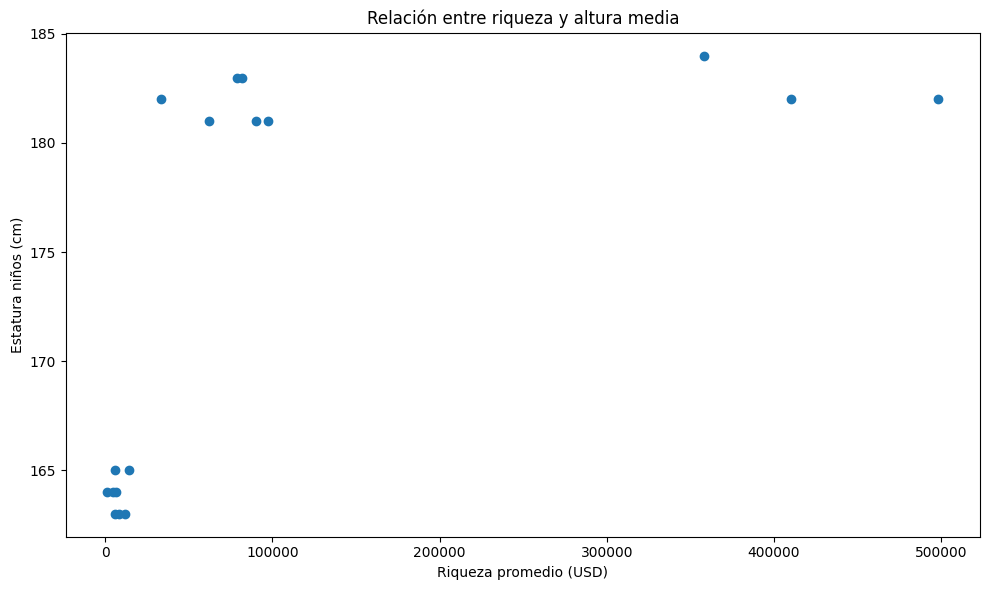

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset de alturas
url_altura = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
alturas = pd.read_html(url_altura)[0]

# Renombrar columnas usando los nombres reales
alturas = alturas.rename(columns={
    'Country': 'País',
    'Average Height, Boys, 19 yo (cm)↓': 'Estatura niños (cm)',
    'Girls 19 (cm)': 'Estatura niñas (cm)'
})

# Seleccionar solo las columnas necesarias
alturas = alturas[['País', 'Estatura niños (cm)', 'Estatura niñas (cm)']]

# b. Gráfico de barras para los 10 países más altos y más bajos + Colombia
alturas_sorted = alturas.sort_values('Estatura niños (cm)', ascending=False)
top10 = alturas_sorted.head(10)
bottom10 = alturas_sorted.tail(10)
colombia = alturas[alturas['País'] == 'Colombia']
barras = pd.concat([top10, bottom10, colombia])

plt.figure(figsize=(12, 6))
barras.plot(x='País', y=['Estatura niños (cm)', 'Estatura niñas (cm)'], kind='bar')
plt.ylabel('Estatura (cm)')
plt.title('Comparación de estatura media por país')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# c. Relación altura y riqueza
url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
income = pd.read_html(url_income)[0]
income = income.rename(columns={
    'Country': 'País',
    'Wealth per Adult 2022↓': 'Riqueza (USD)'
})

income = income[['País', 'Riqueza (USD)']]

income['Riqueza (USD)'] = (
    income['Riqueza (USD)']
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(' ', '')
    .replace('', None)
    .astype(float)
)

merged = pd.merge(alturas, income, on='País')
top10_altura = merged.sort_values('Estatura niños (cm)', ascending=False).head(10)
bottom10_altura = merged.sort_values('Estatura niños (cm)').head(10)
datos = pd.concat([top10_altura, bottom10_altura])

datos = datos.dropna(subset=['Riqueza (USD)', 'Estatura niños (cm)'])

plt.figure(figsize=(10, 6))
plt.scatter(datos['Riqueza (USD)'], datos['Estatura niños (cm)'])
plt.xlabel('Riqueza promedio (USD)')
plt.ylabel('Estatura niños (cm)')
plt.title('Relación entre riqueza y altura media')
plt.tight_layout()
plt.show()
